In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv(r'C:\Users\ngocd\source\Github\DataAnalysisProjects\HigherEducation\IAUData.csv', encoding='latin-1')

In [6]:
## Clean data
data = data.dropna()
data.columns = data.columns.str.strip()

In [7]:
## Specify the columns of interest, here is all the changes made by institutions
inst_change = ['CHGStrgy', 'CHGMltimodal', 'CHGSpace', 'CHGBudget', 'CHGCollab', 'CHGIntlExp', 'CHGEmpt']

## Convert the numeric values to the names of the region
data['Region'] = data['Region'].map({1: 'Africa', 2: 'Asia & Pacific', 3: 'Europe', 4: 'Latin America', 5: 'Middle East', 6: 'North America'})

## Melt the DataFrame for long format
df_melted = data.melt(id_vars=['Region'], value_vars=inst_change, var_name='ChangeFactor', value_name='Score')

# Convert the Score column to integers
df_melted['Score'] = pd.to_numeric(df_melted['Score'], errors='coerce')

# Filter for scores of interest (e.g., scores of 4 and above)
df_filtered = df_melted[df_melted['Score'] >= 4]

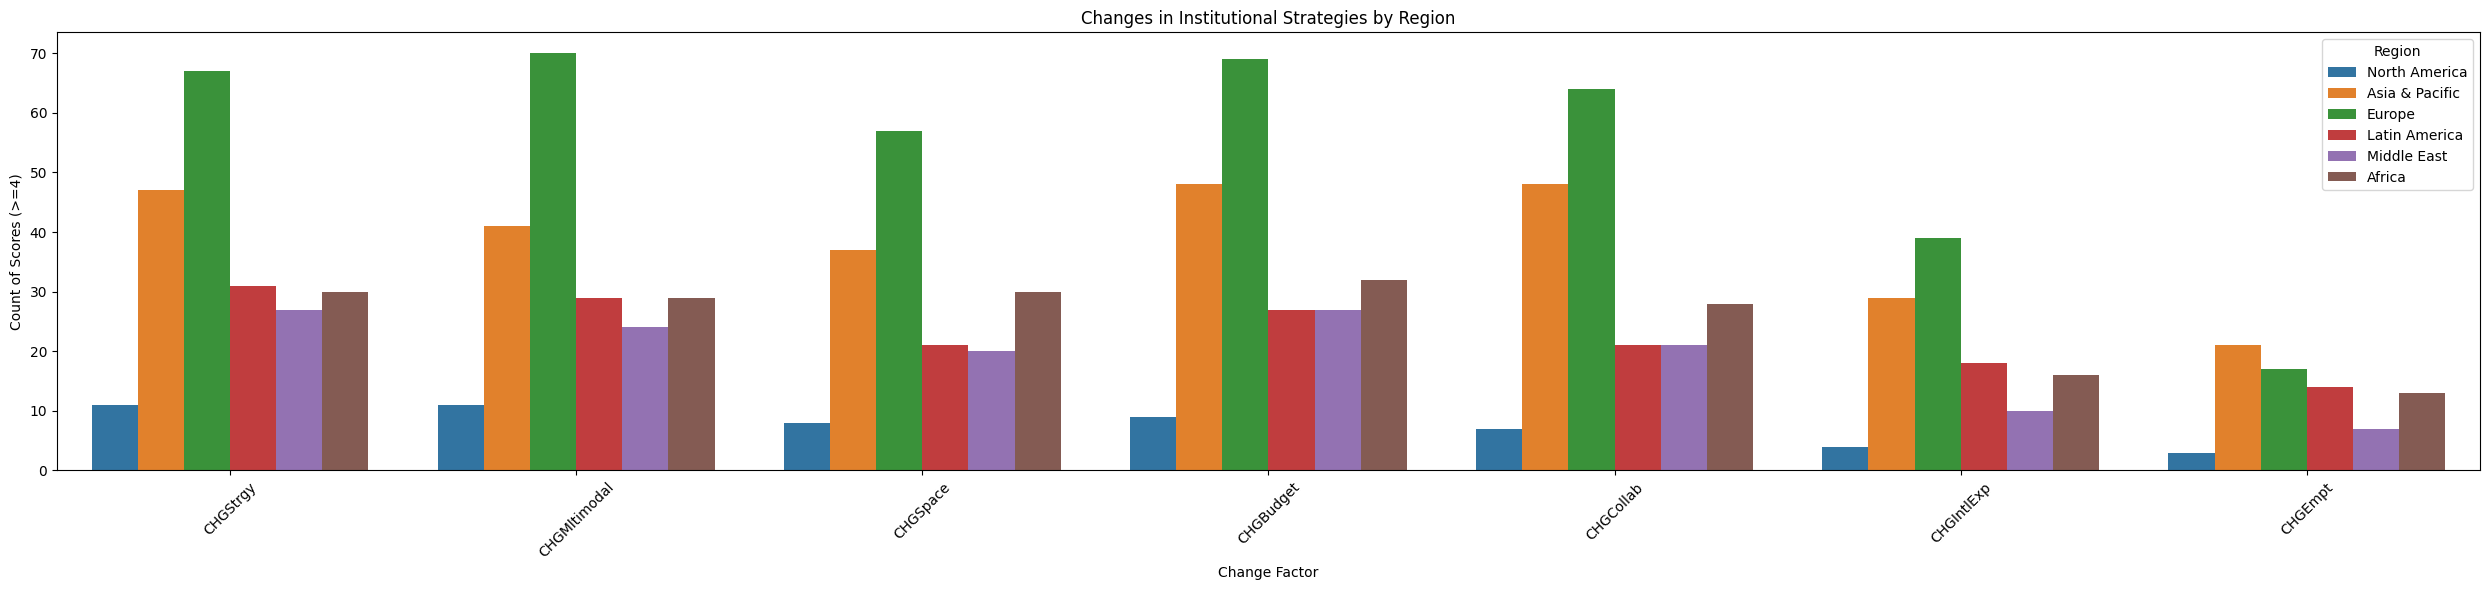

In [8]:
# Plot the data
plt.figure(figsize=(25,6))
sns.countplot(data=df_filtered, x='ChangeFactor', hue='Region')
plt.title('Changes in Institutional Strategies by Region')
plt.xlabel('Change Factor')
plt.ylabel('Count of Scores (>=4)')
plt.legend(title='Region')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot
plt.savefig('institutional_changes_by_region.png')

# Show the plot
plt.show()